In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf

C:\Users\hugma\AppData\Local\Temp\ipykernel_33136\512631993.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
filelocation_TET = 'NDT_all_12thDec_uncleaned.csv'


In [4]:
class csv_splitter:

    def __init__(self,excel_file_name):
        self.excel_file_location = f'c:\\Users\\hugma\\diss\\{excel_file_name}'
        self.dataframes = None
    def read_excel(self):
        try:
            df_excel_file_name = pd.read_csv(self.excel_file_location)
            return df_excel_file_name
        except Exception as e:
            print(f"error reading Excel file: {e}")
    def split_by_header(self,df_excel_file_name, heading):
        if heading not in df_excel_file_name.columns:
            print(f"Error: '{heading}' not found in DataFrame columns.")
            return None
        heading_values = df_excel_file_name[heading].unique()
        split_df = {value: df_excel_file_name[df_excel_file_name[heading] == value] for value in heading_values}
        split_df_array = [[key, value] for key, value in split_df.items()]
        return split_df, split_df_array

In [5]:
feelings = ['MetaAwareness','Presence','PhysicalEffort','MentalEffort','Boredom', 'Receptivity', 'EmotionalIntensity', 'Clarity', 'Release', 'Bliss', 'Embodiment', 'Insightfulness', 'SpiritualExperience']
csv_splitter_instance = csv_splitter(filelocation_TET)
df_csv_file = csv_splitter_instance.read_excel()
split_dict = {}
for (subject, week, session), group in df_csv_file.groupby(['Subject', 'Week', 'Session']):
    split_dict[(subject, week, session)] = group[feelings].copy()

In [6]:
acf_results = {feeling: [] for feeling in feelings}

# Number of lags for ACF calculation
n_lags = 40

# Calculate ACF for each feeling in each DataFrame
for key, df in split_dict.items():
    for feeling in feelings:
        acf_value = acf(df[feeling], nlags=n_lags, fft=True)
        acf_results[feeling].append(acf_value)

# Average the ACFs across all entries for each feeling
acf_averages = {feeling: np.mean(np.vstack(acf_results[feeling]), axis=0) for feeling in feelings}

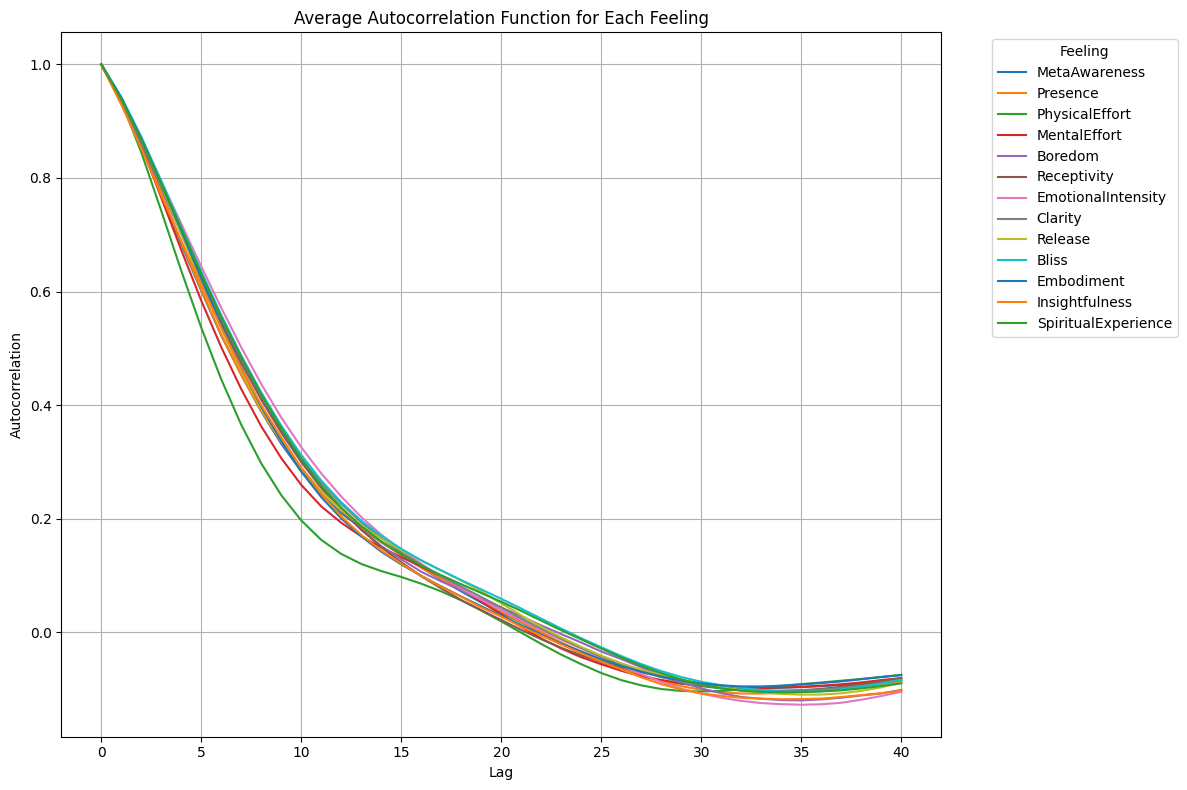

In [7]:
plt.figure(figsize=(12, 8))
for feeling, acf_vals in acf_averages.items():
    plt.plot(acf_vals, label=feeling)

plt.title('Average Autocorrelation Function for Each Feeling')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.legend(title='Feeling', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout() 
plt.savefig("C:/Users/hugma/diss/data/Autocorrelation for each feeling")

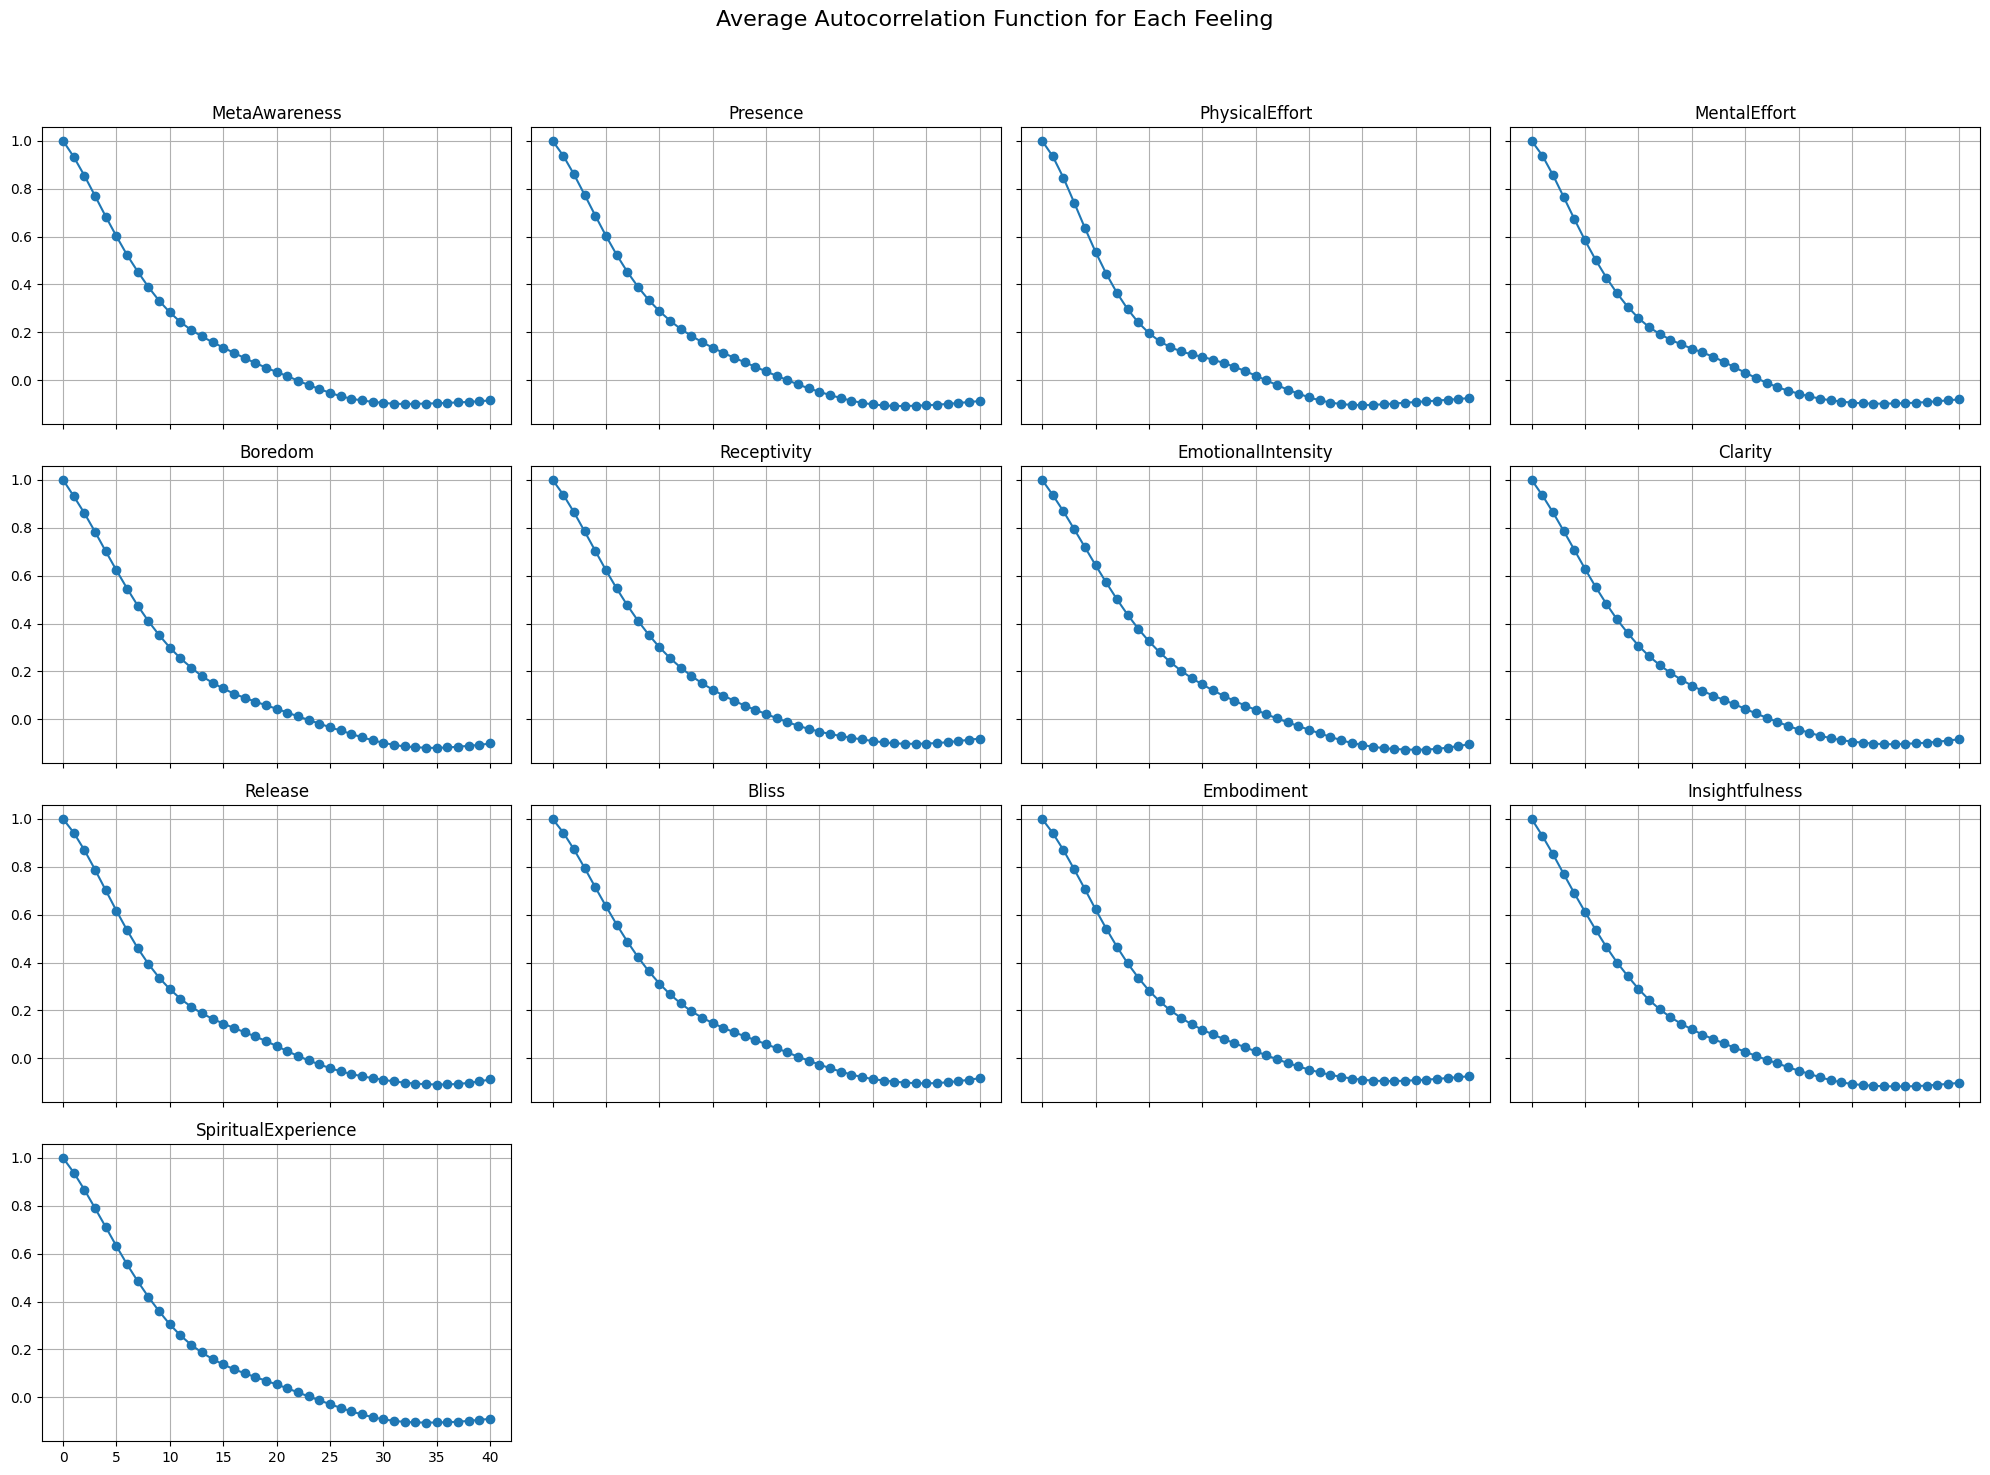

: 

In [8]:
n_rows = 4
n_cols = 4
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 15), sharex=True, sharey=True)
fig.suptitle('Average Autocorrelation Function for Each Feeling', fontsize=16)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plotting
for i, feeling in enumerate(acf_averages):
    axes[i].plot(acf_averages[feeling], marker='o', linestyle='-')
    axes[i].set_title(feeling)
    axes[i].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the rectangle in which to fit subplots.

# Optionally, turn off axes for unused subplots if feelings are less than the number of subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')
plt.savefig("C:/Users/hugma/diss/data/Autocorrelation for each feeling individually")
